# SVM

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (5,3)

from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate

from scipy import stats

from ipywidgets import interact

## XOR Dataset

Text(0, 0.5, 'X2')

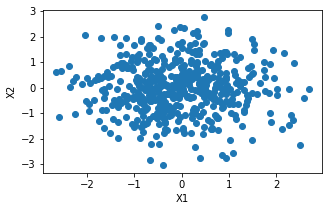

In [5]:
# Dataset with 500 data points and noise of 20%
n = 500
noise = 0.2

np.random.seed(0)
X = np.random.randn(n, 2)
plt.scatter(X[:,0], X[:,1])
plt.xlabel("X1")
plt.ylabel("X2")

In [6]:
print(X.shape)
x1 = X[:, 0]
x2 = X[:, 1]

(500, 2)


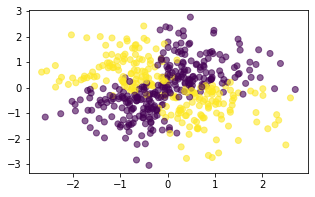

In [9]:
# Build of binary class y where y=1 if and only if (X1 > ε xor X2 > ε)
epsilon = noise * np.random.randn(n, )

y_bool = np.logical_xor(
    x1 > epsilon, 
    x2 > epsilon
)
y = np.where(y_bool, 1, 0)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6)

## SVM Linear

In [11]:
#cost = 1
svc = SVC(kernel='linear', C=1)
svc.fit(X, y)
svc.score(X,y)

0.558

### Compare with SGD Classifier

In [12]:
from sklearn.linear_model import SGDClassifier
svc_bis = SGDClassifier(loss='hinge')
svc_bis.fit(X, y)
svc_bis.score(X,y)

0.514

## SVM - Kernel

### Polynomial

In [14]:
# degree 2 and cost 100
svc = SVC(kernel='poly', degree=2, C=100).fit(X,y)
svc.score(X,y)

0.89

#### Moons dataset

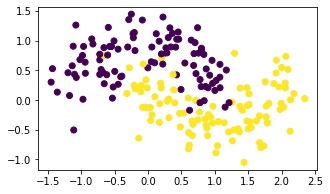

In [46]:
#creation of moon dataset with 200 points
n=200
X,y = make_moons(n_samples=n, noise=0.25, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y)

In [24]:
#testing polynomial SVM with diferents costs and degrees
@interact(C=[1, 10, 1000, 10000, 100000], degree=[1,2,3,4,5,6,7,8,9])
def svc(C, degree):
    svm = SVC(kernel='poly', C=C, degree=degree)
    svm.fit(X, y)
    print(svm.score(X,y))

interactive(children=(Dropdown(description='C', options=(1, 10, 1000, 10000, 100000), value=1), Dropdown(descr…

### RBF

In [30]:
svc = SVC(kernel='rbf',gamma=1, C=0.1).fit(X,y)
svc.score(X,y)

0.91

In [31]:
@interact(C=[0.1, 1, 10, 1000, 10000, 100000], gamma=[0.001, 0.01, 0.1, 1, 10, 100, 1000])
def svc(C, gamma):
    svm = SVC(kernel='rbf', C=C, gamma=gamma)
    svm.fit(X, y)
    print(svm.score(X,y))

interactive(children=(Dropdown(description='C', options=(0.1, 1, 10, 1000, 10000, 100000), value=0.1), Dropdow…

### Sigmoid

In [34]:
@interact(C=[0.1, 1, 10, 1000, 10000, 100000], gamma=[0.001, 0.01, 0.1, 1, 10], coef0=[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4])
def svc(C, gamma, coef0):
    svm = SVC(kernel='sigmoid', C=C, gamma=gamma, coef0=coef0)
    svm.fit(X, y)
    print(svm.score(X,y))

interactive(children=(Dropdown(description='C', options=(0.1, 1, 10, 1000, 10000, 100000), value=0.1), Dropdow…

#### Grid Search for sigmoid kernel

In [40]:
model = SVC(kernel='sigmoid')

grid = {'C': [0.1, 1, 10, 100, 1000, 10000], 'gamma': [0.001, 0.01, 0.1, 1, 10], 'coef0': stats.randint(-10,10)}

search = RandomizedSearchCV(model, grid, 
                            scoring='r2',
                            n_iter=100,  # number of draws
                            cv=5, n_jobs=-1)

search.fit(X, y)
search.best_estimator_

SVC(C=10000, coef0=-4, gamma=1, kernel='sigmoid')

❓ Plot your best model's decision boundaries

In [38]:
svm = SVC(kernel='sigmoid', C=10000, gamma=1, coef0=-4)
svm.fit(X, y)
svm.score(X,y)

0.935

#### Cross validate for sigmoid kernel


In [43]:
svm = SVC(kernel='sigmoid', C=10000, gamma=1, coef0=-4)

cv_results = cross_validate(svm, X, y, cv=5)
cv_results['test_score'].mean()

0.9049999999999999

### Test Kernel in a new dataset

Creating new dataset with 100 points

In [47]:
#creation of moon dataset with 100 points
n=100
X_test,y_test = make_moons(n_samples=n, noise=0.25, random_state=0)

Group the datasets

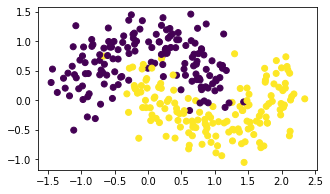

In [50]:
X_full = np.vstack((X, X_test))
y_full = np.append(y, values = y_test)
plt.scatter(X_full[:,0], X_full[:,1], c=y_full)

In [51]:
svm = SVC(kernel='sigmoid', C=10000, gamma=1, coef0=-4)
svm.fit(X, y)
svm.score(X_test, y_test)

0.95